### Домашня работа 2.
### Логистическая регрессия. Работа с признаками


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Можно получить 4.5 бонусных балла.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
print('Всем удачи!👒 Тут она точно пригодится.')

Всем удачи!👒 Тут она точно пригодится.


In [2]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Логистическая регрессия своими руками (4 балла)

Реализуйте логистическую регрессию, обучаемую с помощью:

**Задание 1 (1.5 балла). Градиентного спуска**

**Задание 2 (1.5 балла). Стохастического градиентного спуска**

Во всех пунктах необходимо соблюдать следующие условия:
- Градиентный спуск необходимо записать в векторном виде
- Циклы средствами python допускается использовать только для итераций градиентного спуска;
- В качестве критерия останова необходимо использовать (одновременно):

        проверку на евклидову норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) задаваемого параметром `tolerance`;


        достижение максимального числа итераций (например, 10000), задаваемого параметром `max_iter`.

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса loss_history. В нём после вызова метода fit должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);

Инициализировать веса можно случайным образом или нулевым вектором.

Полезно [почитать](https://scikit-learn.org/stable/developers/develop.html).

In [3]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic', 
                 tolerance=1e-6, max_iter=1000, w0=None, eta=1e-2, size=None):
        """
        gd_type: 'full' or 'stochastic' 
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) — init weights
        eta: learning rate
        size: int, optional - size of samples for stochastic gradient descent
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.eta = eta
        self.size = size
        self.w = None
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        self.loss_history = []
        if self.w0 is None:
            self.w0 = np.random.rand(X.shape[1])
        self.w = self.w0.copy()
        
        for _ in range(self.max_iter):
            gradient = self.calc_gradient(X, y)
            self.w = self.w - self.eta * gradient
            loss = self.calc_loss(X, y)
            self.loss_history.append(loss)
            
            if np.linalg.norm(self.eta * gradient) < self.tolerance:
                break
        
        return self
    
    def predict_proba(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return 1 / (1 + np.exp(-np.dot(X, self.w)))
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return np.round(self.predict_proba(X))
    
    def calc_gradient(self, X, y):
        if self.gd_type == 'stochastic':
            if self.size is None:
                self.size = 1  # Устанавливаем значение по умолчанию, если не указано
            indices = np.random.choice(X.shape[0], size=self.size)
            X_train_np = X.values
            x_samples = X_train_np[indices]
            y_samples = y[indices]
            predictions = self.predict_proba(x_samples)
            errors = y_samples - predictions
            gradient = -np.dot(x_samples.T, errors) / len(y_samples)
        else:
            predictions = self.predict_proba(X)
            error = y - predictions
            gradient = -np.dot(X.T, error) / len(y)
    
        return gradient

    def calc_loss(self, X, y):
        predictions = self.predict_proba(X)
        epsilon = 1e-15  
        loss = -np.mean(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon))
        return loss


Синтетические данные

In [4]:
%pylab inline
import pandas as pd
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Важно:** далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

**Задание 3 (1 балл)**

Обучите логистическую регрессию на синтетических данных.

In [6]:
model1 = LogReg(gd_type='full', max_iter=1000, tolerance=1e-6, eta=0.01)
model2 = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-6, eta=0.01, size = 5)

start_time = time.time()
model1.fit(X_train, y_train)
end_time = time.time()
gradient_descent_time = end_time - start_time
start_time = time.time()
model2.fit(X_train, y_train)
end_time = time.time()
stochastic_gradient_descent_time = end_time - start_time

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)


accuracy1 = np.mean(y_pred1 == y_test)
accuracy2 = np.mean(y_pred2 == y_test)

print(f"Точность модели на тестовом наборе (Градиентный спуск): {accuracy1:.2f}")
print(f"Точность модели на тестовом наборе (Стохастический градиентный спуск): {accuracy2:.2f}")

# Вывод времени выполнения для каждого метода
print(f"Время выполнения Градиентного спуска: {gradient_descent_time:.4f} сек.")
print(f"Время выполнения Стохастического градиентного спуска: {stochastic_gradient_descent_time:.4f} сек.")

Точность модели на тестовом наборе (Градиентный спуск): 0.85
Точность модели на тестовом наборе (Стохастический градиентный спуск): 0.85
Время выполнения Градиентного спуска: 2.5509 сек.
Время выполнения Стохастического градиентного спуска: 1.8440 сек.


На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые. Проинтерпретируйте результат.

ROC-AUC (Градиентный спуск): 0.93
ROC-AUC (Стохастический градиентный спуск): 0.92
PR-AUC (Градиентный спуск): 0.92
PR-AUC (Стохастический градиентный спуск): 0.92


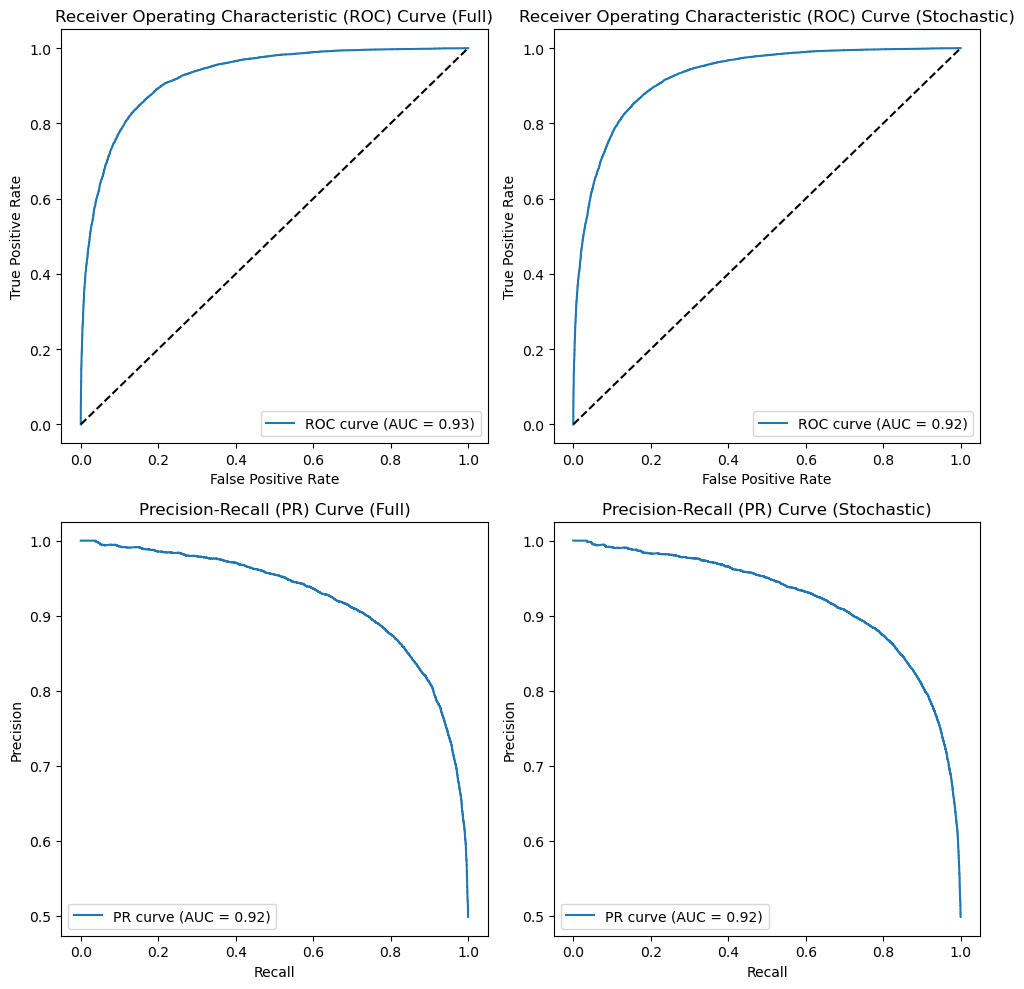

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Получение вероятностей принадлежности к классу 1 для тестового набора
y_prob1 = model1.predict_proba(X_test)
y_prob2 = model2.predict_proba(X_test)

# Вычисление ROC-AUC
roc_auc1 = roc_auc_score(y_test, y_prob1)
roc_auc2 = roc_auc_score(y_test, y_prob2)
print(f"ROC-AUC (Градиентный спуск): {roc_auc1:.2f}")
print(f"ROC-AUC (Стохастический градиентный спуск): {roc_auc2:.2f}")

# Вычисление PR-AUC
precision1, recall1, _ = precision_recall_curve(y_test, y_prob1)
precision2, recall2, _ = precision_recall_curve(y_test, y_prob2)
pr_auc1 = auc(recall1, precision1)
pr_auc2 = auc(recall2, precision2)
print(f"PR-AUC (Градиентный спуск): {pr_auc1:.2f}")
print(f"PR-AUC (Стохастический градиентный спуск): {pr_auc2:.2f}")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Построение ROC кривой
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
axes[0][0].plot(fpr1, tpr1, label=f'ROC curve (AUC = {roc_auc1:.2f})')
axes[0][0].plot([0, 1], [0, 1], 'k--')
axes[0][0].set_xlabel('False Positive Rate')
axes[0][0].set_ylabel('True Positive Rate')
axes[0][0].set_title('Receiver Operating Characteristic (ROC) Curve (Full)')
axes[0][0].legend(loc='lower right')

fpr2, tpr2, _ = roc_curve(y_test, y_prob2)
axes[0][1].plot(fpr2, tpr2, label=f'ROC curve (AUC = {roc_auc2:.2f})')
axes[0][1].plot([0, 1], [0, 1], 'k--')
axes[0][1].set_xlabel('False Positive Rate')
axes[0][1].set_ylabel('True Positive Rate')
axes[0][1].set_title('Receiver Operating Characteristic (ROC) Curve (Stochastic)')
axes[0][1].legend(loc='lower right')

# Построение ROC кривой
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
axes[1][0].plot(recall1, precision1, label=f'PR curve (AUC = {pr_auc1:.2f})')
axes[1][0].set_xlabel('Recall')
axes[1][0].set_ylabel('Precision')
axes[1][0].set_title('Precision-Recall (PR) Curve (Full)')
axes[1][0].legend(loc='lower left')

fpr2, tpr2, _ = roc_curve(y_test, y_prob2)
axes[1][1].plot(recall2, precision2, label=f'PR curve (AUC = {pr_auc2:.2f})')
axes[1][1].set_xlabel('Recall')
axes[1][1].set_ylabel('Precision')
axes[1][1].set_title('Precision-Recall (PR) Curve (Stochastic)')
axes[1][1].legend(loc='lower left')

plt.tight_layout()
plt.show()

#### Важный комментарий: при реализации я вычислял не по 1 случайному, а по 5, так как мы часто двигались в невероятно неправильном направлении. Можно проверить исходную версию поменяв  "indices = np.random.choice(X.shape[0], size=5)" на  "indices = np.random.choice(X.shape[0], size=1)". При size = 10 результат уже трудноотличим от варианта "full"

Интерпретация. Градиентный спуск работает, вычисляя градиент функции потерь по параметрам модели для всего набора данных. Он обновляет параметры модели в направлении, противоположном градиенту, с некоторым шагом, называемым скоростью обучения (learning rate). Этот процесс повторяется до тех пор, пока не будет достигнут критерий остановки, такой как сходимость алгоритма или достижение предопределенного числа итераций. Соответственно, стохастический градиентный спуск (SGD) является вариантом градиентного спуска, который использует только один случайный экземпляр данных (или небольшую подвыборку как в моем случае) для вычисления градиента на каждой итерации. Он:
1. Быстрее сходится (по времени, не по итерациям), так как использует только часть данных для каждого обновления весов, что уменьшает вычислительную нагрузку.
2. При правильной настройке сходится к тому же результату

## Часть 2. Работа с категориальными переменными (3 балла)

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет.

In [43]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [44]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
data.reset_index(drop=True, inplace=True)
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

# Далее везде значение size будет равно 1

**Задание 5 (0 баллов).** Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

Как мы помним, метод случайный, поэтому будем замерять время используя несколько итераций

In [10]:
import random
from tqdm import tqdm
# Создаем пустые списки для хранения времени выполнения и метрик ROC-AUC
times_3 = []
roc_auc_scores_3 = []

for i in tqdm(range(100)):
    # Создаем модель с градиентным спуском
    model_3 = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-4, eta=0.01, size=2)
    
    # Замеряем время выполнения
    start_time = time.time()
    model_3.fit(X_train, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    times_3.append(execution_time)
    
    # Вычисляем ROC-AUC
    y_prob_3 = model_3.predict_proba(X_test)
    roc_auc_3 = roc_auc_score(y_test, y_prob_3)
    roc_auc_scores_3.append(roc_auc_3)

    #print(f"Iteration {i + 1}: ROC-AUC = {roc_auc_3:.4f}, Time = {execution_time:.4f} sec")

# Среднее время выполнения и средний ROC-AUC
average_time_3 = sum(times_3) / len(times_3)
average_roc_auc_3 = sum(roc_auc_scores_3) / len(roc_auc_scores_3)

print(f"\nAverage ROC-AUC: {average_roc_auc_3:.4f}")
print(f"Average Execution Time: {average_time_3:.4f} sec")


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.94it/s]


Average ROC-AUC: 0.5033
Average Execution Time: 0.1334 sec


**Задание 6 (0.5 балла).** Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

In [45]:
columns = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
X_train_ohe = pd.get_dummies(X_train, columns=columns, drop_first=True)
X_test_ohe = pd.get_dummies(X_test, columns=columns, drop_first=True)

In [49]:
# Создаем пустые списки для хранения времени выполнения и метрик ROC-AUC
times_2 = []
roc_auc_scores_2 = []

# Выполняем цикл
for i in tqdm(range(100)):
    # Создаем модель с градиентным спуском
    model_2 = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-4, eta=0.01, size=1)
    
    # Замеряем время выполнения
    start_time = time.time()
    model_2.fit(X_train_ohe, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    times_2.append(execution_time)
    
    # Вычисляем ROC-AUC
    y_prob_2 = model_2.predict_proba(X_test_ohe)
    roc_auc_2 = roc_auc_score(y_test, y_prob_2)
    roc_auc_scores_2.append(roc_auc_2)

    #print(f"Iteration {i + 1}: ROC-AUC = {roc_auc_2:.4f}, Time = {execution_time:.4f} sec")

# Среднее время выполнения и средний ROC-AUC
average_time_2 = sum(times_2) / len(times_2)
average_roc_auc_2 = sum(roc_auc_scores_2) / len(roc_auc_scores_2)

print(f"\nAverage ROC-AUC: {average_roc_auc_2:.4f}")
print(f"Average Execution Time: {average_time_2:.4f} sec")

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:30<00:00,  3.29it/s]


Average ROC-AUC: 0.5101
Average Execution Time: 0.2247 sec


Теперь нужно значительно больше времени. Зато растет качество модели

Как можно было заменить, one-hot-кодирование сильно увилечивает количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 7 (1.5 балла).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше, без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментом. Заметили ли вы что-то интересное?


In [53]:
X_train_counts = X_train.copy()
X_test_counts = X_test.copy()

for ind in columns:
    cat_list = np.unique(X_train[ind])
    counts_train = np.zeros(np.size(X_train[ind]))
    counts_test = np.zeros(np.size(X_test[ind]))
    for cat in cat_list:         
        cat_val = np.sum(np.equal(X_train[ind], cat) & y_train == 1) / np.sum(np.equal(X_train[ind], cat))
        counts_train[X_train[ind] == cat] = cat_val
        counts_test[X_test[ind] == cat] = cat_val
    X_train_counts.loc[:, ind] = counts_train
    X_test_counts.loc[:, ind] = counts_test

In [54]:
# Создаем пустые списки для хранения времени выполнения и метрик ROC-AUC
times = []
roc_auc_scores = []

for i in tqdm(range(100)):
    # Используем это случайное значение для создания модели
    model = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-4, eta=0.01, size=1)
    
    # Замеряем время выполнения
    start_time = time.time()
    model.fit(X_train_counts, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    times.append(execution_time)
    
    # Вычисляем ROC-AUC
    y_prob = model.predict_proba(X_test_counts)
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores.append(roc_auc)

    #print(f"Iteration {i + 1}: ROC-AUC = {roc_auc:.4f}, Time = {execution_time:.4f} sec")

# Среднее время выполнения и средний ROC-AUC
average_time = sum(times) / len(times)
average_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

print(f"\nAverage ROC-AUC: {average_roc_auc:.4f}")
print(f"Average Execution Time: {average_time:.4f} sec")

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.28it/s]


Average ROC-AUC: 0.5119
Average Execution Time: 0.0556 sec


Выполняется практически так же быстро, как и изначальная версия с числами. Очевидно, с OHE мы обучались значительно медленнее, так как количество столбцов данных было значительно выше. Но у OHE ОБЫЧНО выше качество, однако не сейчас.

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо так, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 8 (1 балл)__. Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.


In [55]:
X_train_counts = X_train.copy()
X_test_counts = X_test.copy()

for ind in columns:
    cat_list = np.unique(X_train[ind])
    counts_train = np.zeros(np.size(X_train[ind]))
    counts_test = np.zeros(np.size(X_test[ind]))
    for cat in cat_list:         
        cat_val = np.sum(np.equal(X_train[ind], cat) & y_train == 1) / np.sum(np.equal(X_train[ind], cat))
        # Добавляем шум к значениям счётчиков
        noise = np.random.normal(0, 0.1, 1)  # настраиваемый уровень шума
        cat_val_with_noise = cat_val + noise
        counts_train[X_train[ind] == cat] = cat_val_with_noise
        counts_test[X_test[ind] == cat] = cat_val_with_noise
    X_train_counts.loc[:, ind] = counts_train
    X_test_counts.loc[:, ind] = counts_test

In [56]:
# Создаем пустые списки для хранения времени выполнения и метрик ROC-AUC
gd_times = []
gd_roc_auc_scores = []

for i in tqdm(range(100)):
    # Создаем модель с градиентным спуском
    model_gd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-4, eta=0.01, size=1)
    
    # Замеряем время выполнения градиентного спуска
    start_time = time.time()
    model_gd.fit(X_train_counts, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    gd_times.append(execution_time)
    
    # Вычисляем ROC-AUC для градиентного спуска
    y_prob_gd = model_gd.predict_proba(X_test_counts)
    roc_auc_gd = roc_auc_score(y_test, y_prob_gd)
    gd_roc_auc_scores.append(roc_auc_gd)

    #print(f"Iteration {i + 1}: ROC-AUC = {roc_auc_gd:.4f}, Time = {execution_time:.4f} sec")

# Среднее время выполнения и средний ROC-AUC
avg_gd_time = sum(gd_times) / len(gd_times)
avg_gd_roc_auc = sum(gd_roc_auc_scores) / len(gd_roc_auc_scores)

print(f"\nAverage ROC-AUC: {avg_gd_roc_auc:.4f}")
print(f"Average Execution Time: {avg_gd_time:.4f} sec")


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Average ROC-AUC: 0.5109
Average Execution Time: 0.0545 sec


Качество в среднем оказалось на том же уровне, чем при обычном счетчике. Обычно ожидаю обратное, но разница на уровне погрешности

## Часть 3. Отбор признаков (3 балла + 1 бонус)

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом они увеличивают время вычислений) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [57]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [58]:
columns = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
X_train_ohe = pd.get_dummies(X_train, columns=columns, drop_first=True)
X_test_ohe = pd.get_dummies(X_test, columns=columns, drop_first=True)

In [59]:
X_train_ohe.shape

(476169, 213)

Мы получили 213 признаков (важно, что удаляли первый столбец для всех данных, чтобы избежать линейной зависимости)

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

# Далее используем бОльший параметр eta

In [20]:
# Создаем пустые списки для хранения времени выполнения и метрик ROC-AUC
gd_times = []
gd_roc_auc_scores = []

for i in tqdm(range(100)):
    # Создаем модель с градиентным спуском
    model_gd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-4, eta=0.8, size = 1)
    
    # Замеряем время выполнения градиентного спуска
    start_time = time.time()
    model_gd.fit(X_train_ohe, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    gd_times.append(execution_time)
    
    # Вычисляем ROC-AUC для градиентного спуска
    y_prob_gd = model_gd.predict_proba(X_test_ohe)
    roc_auc_gd = roc_auc_score(y_test, y_prob_gd)
    gd_roc_auc_scores.append(roc_auc_gd)

    #print(f"Iteration {i + 1}: ROC-AUC = {roc_auc_gd:.4f}, Time = {execution_time:.4f} sec")

# Среднее время выполнения и средний ROC-AUC
avg_gd_time = sum(gd_times) / len(gd_times)
avg_gd_roc_auc = sum(gd_roc_auc_scores) / len(gd_roc_auc_scores)

print(f"\nAverage ROC-AUC: {avg_gd_roc_auc:.4f}")
print(f"Average Execution Time: {avg_gd_time:.4f} sec")


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:42<00:00,  1.02s/it]


Average ROC-AUC: 0.5068
Average Execution Time: 0.9200 sec


Направшивается увеличение eta еще больше, но начинаем получать ошибки при значениях выше

### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 10 (1 балл).__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

model = LogisticRegression(max_iter=1000, n_jobs = -1, tol = 0.1, solver='sag') #Используем встроенную. Еще и стох. Работает оч. медленно
model.fit(X_train_ohe, y_train)
selector = SelectFromModel(model, max_features=200)
selector.fit(X_train_ohe, y_train)

X_train_selected = pd.DataFrame(selector.transform(X_train_ohe))
X_test_selected = pd.DataFrame(selector.transform(X_test_ohe))

In [61]:
# Создаем пустые списки для хранения времени выполнения и метрик ROC-AUC
gd_times = []
gd_roc_auc_scores = []

for i in tqdm(range(5)):
    # Создаем модель с градиентным спуском
    model_gd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-4, eta=0.5, size = 1)
    
    # Замеряем время выполнения градиентного спуска
    start_time = time.time()
    model_gd.fit(X_train_selected, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    gd_times.append(execution_time)
    
    # Вычисляем ROC-AUC для градиентного спуска
    y_prob_gd = model_gd.predict_proba(X_test_selected)
    roc_auc_gd = roc_auc_score(y_test, y_prob_gd)
    gd_roc_auc_scores.append(roc_auc_gd)

    #print(f"Iteration {i + 1}: ROC-AUC = {roc_auc_gd:.4f}, Time = {execution_time:.4f} sec")

# Среднее время выполнения и средний ROC-AUC
avg_gd_time = sum(gd_times) / len(gd_times)
avg_gd_roc_auc = sum(gd_roc_auc_scores) / len(gd_roc_auc_scores)

print(f"\nAverage ROC-AUC: {avg_gd_roc_auc:.4f}")
print(f"Average Execution Time: {avg_gd_time:.4f} sec")


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:09<00:00, 25.81s/it]


Average ROC-AUC: 0.5365
Average Execution Time: 25.7872 sec


При том же параметре eta скорость выполнения меньше. При подборе оптимального параметра скорости обучения - скорость выше чем до удаления столбцов. Покажем это ниже

In [62]:
# Создаем пустые списки для хранения времени выполнения и метрик ROC-AUC
gd_times = []
gd_roc_auc_scores = []

for i in tqdm(range(100)):
    # Создаем модель с градиентным спуском
    model_gd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-4, eta=2, size = 1)
    
    # Замеряем время выполнения градиентного спуска
    start_time = time.time()
    model_gd.fit(X_train_selected, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    gd_times.append(execution_time)
    
    # Вычисляем ROC-AUC для градиентного спуска
    y_prob_gd = model_gd.predict_proba(X_test_selected)
    roc_auc_gd = roc_auc_score(y_test, y_prob_gd)
    gd_roc_auc_scores.append(roc_auc_gd)

    #print(f"Iteration {i + 1}: ROC-AUC = {roc_auc_gd:.4f}, Time = {execution_time:.4f} sec")

# Среднее время выполнения и средний ROC-AUC
avg_gd_time = sum(gd_times) / len(gd_times)
avg_gd_roc_auc = sum(gd_roc_auc_scores) / len(gd_roc_auc_scores)

print(f"\nAverage ROC-AUC: {avg_gd_roc_auc:.4f}")
print(f"Average Execution Time: {avg_gd_time:.4f} sec")


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.44it/s]


Average ROC-AUC: 0.5240
Average Execution Time: 0.3863 sec


Можно также заметить, что выросло качество

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Создаем объект MinMaxScaler
X_train_ohe = pd.DataFrame(scaler.fit_transform(X_train_ohe))
X_test_ohe = pd.DataFrame(scaler.transform(X_test_ohe))

model = LogisticRegression(max_iter=1000, n_jobs = -1, tol = 0.1, solver='sag') #Используем встроенную. Еще и c "sag". Так как работает оч. медленно
model.fit(X_train_ohe, y_train)
selector = SelectFromModel(model, max_features=200)
selector.fit(X_train_ohe, y_train)

X_train_selected = pd.DataFrame(selector.transform(X_train_ohe))
X_test_selected = pd.DataFrame(selector.transform(X_test_ohe))

In [25]:
# Создаем пустые списки для хранения времени выполнения и метрик ROC-AUC
gd_times = []
gd_roc_auc_scores = []

for i in tqdm(range(100)):
    # Создаем модель с градиентным спуском
    model_gd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-4, eta=2, size = 1)
    
    # Замеряем время выполнения градиентного спуска
    start_time = time.time()
    model_gd.fit(X_train_selected, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    gd_times.append(execution_time)
    
    # Вычисляем ROC-AUC для градиентного спуска
    y_prob_gd = model_gd.predict_proba(X_test_selected)
    roc_auc_gd = roc_auc_score(y_test, y_prob_gd)
    gd_roc_auc_scores.append(roc_auc_gd)

    #print(f"Iteration {i + 1}: ROC-AUC = {roc_auc_gd:.4f}, Time = {execution_time:.4f} sec")

# Среднее время выполнения и средний ROC-AUC
avg_gd_time = sum(gd_times) / len(gd_times)
avg_gd_roc_auc = sum(gd_roc_auc_scores) / len(gd_roc_auc_scores)

print(f"\nAverage ROC-AUC: {avg_gd_roc_auc:.4f}")
print(f"Average Execution Time: {avg_gd_time:.4f} sec")


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.61it/s]


Average ROC-AUC: 0.5413
Average Execution Time: 0.3579 sec


Теперь признаки выбрались лучше, поэтому качество выше, чем в попытке до этого. А скорость на том же уровне

__Задание 10 (0.5 балла).__
Можно задать отбор признаков более функционально. Вспомним, что L1-регуляризация также умеет отбирать признаки. Понятно, что теперь нам будет сложнее оставить именно 200 лучших признаков, но возможно они нам и не нужны. Подберите коэффициент регуляризации и проверьте, как изменилось качество. Получилось ли добиться лучшего качества при менее чем 200 признаках?

Я буду использовать Lasso

In [26]:
columns = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
X_train_ohe = pd.get_dummies(X_train, columns=columns, drop_first=True)
X_test_ohe = pd.get_dummies(X_test, columns=columns, drop_first=True)

scaler = MinMaxScaler()
X_train_ohe_s = pd.DataFrame(scaler.fit_transform(X_train_ohe))
X_test_ohe_s = pd.DataFrame(scaler.transform(X_test_ohe))

In [27]:
model = LogisticRegression(max_iter=1000, n_jobs=-1, solver='saga', penalty='l1')
model.fit(X_train_ohe_s, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, penalty='l1', solver='saga')

In [28]:
indices = np.where(np.abs(model.coef_[0]) < 1e-5)[0]
X_train_ohe_s = X_train_ohe_s.drop(indices, axis = 1)
X_test_ohe_s = X_test_ohe_s.drop(indices, axis = 1)

In [29]:
X_test_ohe_s.shape

(119043, 196)

In [30]:
# Создаем пустые списки для хранения времени выполнения и метрик ROC-AUC
gd_times = []
gd_roc_auc_scores = []

for i in tqdm(range(100)):
    # Создаем модель с градиентным спуском
    model_gd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-4, eta=2, size = 1)
    
    # Замеряем время выполнения градиентного спуска
    start_time = time.time()
    model_gd.fit(X_train_ohe_s, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    gd_times.append(execution_time)
    
    # Вычисляем ROC-AUC для градиентного спуска
    y_prob_gd = model_gd.predict_proba(X_test_ohe_s)
    roc_auc_gd = roc_auc_score(y_test, y_prob_gd)
    gd_roc_auc_scores.append(roc_auc_gd)

    #print(f"Iteration {i + 1}: ROC-AUC = {roc_auc_gd:.4f}, Time = {execution_time:.4f} sec")

# Среднее время выполнения и средний ROC-AUC
avg_gd_time = sum(gd_times) / len(gd_times)
avg_gd_roc_auc = sum(gd_roc_auc_scores) / len(gd_roc_auc_scores)

print(f"\nAverage ROC-AUC: {avg_gd_roc_auc:.4f}")
print(f"Average Execution Time: {avg_gd_time:.4f} sec")


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.19it/s]


Average ROC-AUC: 0.5336
Average Execution Time: 0.1110 sec


К сожалению для нас, результат оказался немного хуже. Подбирал параметр так, чтобы большинство осталось около 200 признаков

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $mu$, $sigma$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

__Задание 11 (1 балл)__. Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случаев.

Работать далее будет уже со скейлером и преобразованными кат. данными

In [31]:
columns = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
X_train_ohe = pd.get_dummies(X_train, columns=columns, drop_first=True)
X_test_ohe = pd.get_dummies(X_test, columns=columns, drop_first=True)

scaler = MinMaxScaler()
X_train_ohe_s = pd.DataFrame(scaler.fit_transform(X_train_ohe))
X_test_ohe_s = pd.DataFrame(scaler.transform(X_test_ohe))

In [32]:
def calculate_t_statistic(X, y):
    # Разделение данных по классам
    X_pos = X[y == 1]
    X_neg = X[y == 0]
    
    # Вычисление средних значений для каждого класса
    mu_pos = np.mean(X_pos, axis=0)
    mu_neg = np.mean(X_neg, axis=0)
    
    # Вычисление количества объектов каждого класса
    n_pos = len(X_pos)
    n_neg = len(X_neg)
    
    # Вычисление среднеквадратичного отклонения для каждого класса
    sigma_pos = np.std(X_pos, axis=0)
    sigma_neg = np.std(X_neg, axis=0)
    
    # Вычисление t-статистики для каждого признака
    t_statistic = np.abs(mu_pos - mu_neg) / np.sqrt(((n_pos - 1) * sigma_pos ** 2 + (n_neg - 1) * sigma_neg ** 2) / (n_pos + n_neg - 2))
    
    # Отбор индексов признаков с наибольшими значениями t-статистики
    top_indices = np.argsort(t_statistic)[::-1]
    
    return t_statistic, top_indices

In [33]:
# Применение функции для подсчета t-статистики
t_statistics, top_indices = calculate_t_statistic(X_train_ohe_s, y_train)

# Отбор 200 признаков с наибольшими значениями t-статистики
top_200_indices = top_indices[:200]
selected_columns = X_train_ohe_s.columns[top_200_indices]
X_train_selected = X_train_ohe_s[selected_columns]
X_test_selected = X_test_ohe_s[selected_columns]

In [34]:
# Создаем пустые списки для хранения времени выполнения и метрик ROC-AUC
gd_times = []
gd_roc_auc_scores = []

for i in tqdm(range(100)):
    # Создаем модель с градиентным спуском
    model_gd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-4, eta=2, size = 1)
    
    # Замеряем время выполнения градиентного спуска
    start_time = time.time()
    model_gd.fit(X_train_selected, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    gd_times.append(execution_time)
    
    # Вычисляем ROC-AUC для градиентного спуска
    y_prob_gd = model_gd.predict_proba(X_test_selected)
    roc_auc_gd = roc_auc_score(y_test, y_prob_gd)
    gd_roc_auc_scores.append(roc_auc_gd)

    #print(f"Iteration {i + 1}: ROC-AUC = {roc_auc_gd:.4f}, Time = {execution_time:.4f} sec")

# Среднее время выполнения и средний ROC-AUC
avg_gd_time = sum(gd_times) / len(gd_times)
avg_gd_roc_auc = sum(gd_roc_auc_scores) / len(gd_roc_auc_scores)

print(f"\nAverage ROC-AUC: {avg_gd_roc_auc:.4f}")
print(f"Average Execution Time: {avg_gd_time:.4f} sec")


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.59it/s]


Average ROC-AUC: 0.5350
Average Execution Time: 0.1031 sec


Скорость выполнения снова выросла

### Методы-обёртки

__Задание 12 (бонус, 1 балл)__.


Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [35]:
columns = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
X_train_ohe = pd.get_dummies(X_train, columns=columns, drop_first=True)
X_test_ohe = pd.get_dummies(X_test, columns=columns, drop_first=True)

scaler = MinMaxScaler()
X_train_ohe_s = pd.DataFrame(scaler.fit_transform(X_train_ohe))
X_test_ohe_s = pd.DataFrame(scaler.transform(X_test_ohe))

In [36]:
from sklearn.ensemble import RandomForestClassifier
def feature_elimination(X, y, test_size=0.2, top_features=200, batch_size=3):
    # Разделение на обучающую и отложенную выборки
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Инициализация списка выбранных признаков
    selected_features = list(range(X_train.shape[1]))
    
    # Итерационное удаление признаков
    while len(selected_features) > top_features:
        scores = []
        for feature_idx in range(0, len(selected_features), batch_size):
            # Создание нового X_train без выбранной группы признаков
            excluded_features = selected_features[:feature_idx] + selected_features[feature_idx + batch_size:]
            X_train_subset = X_train[:, excluded_features]
            
            # Обучение логистической регрессии и оценка качества на отложенной выборке
            clf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10, max_depth = 1)
            clf.fit(X_train_subset, y_train)
            X_val_subset = X_val[:, excluded_features]
            score = clf.score(X_val_subset, y_val)
            scores.append((score, feature_idx))
        
        # Удаление группы признаков с наименьшим влиянием на качество модели
        worst_batch = min(scores, key=lambda x: x[0])
        selected_features = selected_features[:worst_batch[1]] + selected_features[worst_batch[1] + batch_size:]

    # Выбор топ-200 признаков
    selected_features = selected_features[:top_features]
    
    return selected_features


In [37]:
%%time
# Создание уменьшенного сэмпла данных
X_small_sample = X_train_ohe_s[:10000]
y_small_sample = y_train[:10000]
X_small_sample = X_small_sample.to_numpy()
# Отбор признаков
selected_features = feature_elimination(X_small_sample, y_small_sample)

CPU times: total: 2.17 s
Wall time: 11.1 s


In [38]:
X_train_selected = X_train_ohe_s.iloc[:, selected_features]
X_test_selected = X_test_ohe_s.iloc[:, selected_features]

In [39]:
# Создаем пустые списки для хранения времени выполнения и метрик ROC-AUC
gd_times = []
gd_roc_auc_scores = []

for i in tqdm(range(100)):
    # Создаем модель с градиентным спуском
    model_gd = LogReg(gd_type='stochastic', max_iter=1000, tolerance=1e-4, eta=2, size = 1)
    
    # Замеряем время выполнения градиентного спуска
    start_time = time.time()
    model_gd.fit(X_train_selected, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    gd_times.append(execution_time)
    
    # Вычисляем ROC-AUC для градиентного спуска
    y_prob_gd = model_gd.predict_proba(X_test_selected)
    roc_auc_gd = roc_auc_score(y_test, y_prob_gd)
    gd_roc_auc_scores.append(roc_auc_gd)

    #print(f"Iteration {i + 1}: ROC-AUC = {roc_auc_gd:.4f}, Time = {execution_time:.4f} sec")

# Среднее время выполнения и средний ROC-AUC
avg_gd_time = sum(gd_times) / len(gd_times)
avg_gd_roc_auc = sum(gd_roc_auc_scores) / len(gd_roc_auc_scores)

print(f"\nAverage ROC-AUC: {avg_gd_roc_auc:.4f}")
print(f"Average Execution Time: {avg_gd_time:.4f} sec")


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.03it/s]


Average ROC-AUC: 0.5332
Average Execution Time: 0.0959 sec


Уверен, что мы бы получили наилучший результат, если бы использовали всю выборку целиком, а не только часть ее наблюдений. Но компьютер мой это вычислить не способен

Опционально (это не оценивается) можете рассмотреть более интересные стратегии отбора, чем жадная. Например, генетические алгоритмы. Можно закодировать бинарным вектором, включаем мы или нет тот или иной признак в модель. А дальше генетическим алгоритмом оптимизировать этот вектор. Всё ещё не быстро, но точно быстрее жадного.


**Задание 13 (0.5 балла)** Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству? Если не делали бонус — сравните встроенный метод и метод фильтрации.

**Ответ:** ...

### Методы-обёртки:
##### Преимущества:
1. Ориентированы на конкретную модель: Учитывают влияние признаков на конечную модель (Использовать RF для выбора параметров и потом RF как лучшую модель)
2. Могут учитывать взаимодействие признаков: Позволяют комбинировать признаки для повышения предсказательной силы (Видят связь комбинаций признаков - классический пример про форму фруктов и их цвет в задаче классификации)
##### Недостатки:
1. Вычислительно затратны: Из-за перебора подмножеств признаков требуют больших вычислительных ресурсов.
2. Склонны к переобучению: Могут подстраиваться под обучающий набор, что приводит к недостаточной обобщающей способности. Можно избежать используя дополнительное разделение или (не дай бог) кросс валидацию. Тогда от компа живого места не останется

### Методы фильтрации (например, t-stat):
##### Преимущества:
1. Быстрота: Рассчитывают статистические меры для каждого признака независимо от модели, что делает их вычислительно более эффективными.
2. Простота интерпретации: Результаты фильтрации признаков обычно легко интерпретировать.
##### Недостатки:
1. Игнорирование взаимосвязей с целевой переменной: Фильтрация может упустить важные взаимосвязи признаков с целевой переменной, снижая точность модели.
2. Не учитывают взаимодействие признаков: Не учитывают сложные зависимости между признаками.

### Встроенные методы:
##### Преимущества:
1. Учет контекста модели: Происходит отбор признаков на основе конкретной модели, что позволяет учесть особенности данной модели.
2. Относительная скорость: Встроенные методы могут работают намного быстрее методов-обёрток.
##### Недостатки:
1. Ограниченность обобщения: Встроенные методы могут быть специфичными для определенного типа модели и не всегда переносимы на другие модели.
2. Избыточность: Могут сохранять избыточные или неважные признаки, особенно если модель не чувствительна к ним.